In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib notebook

Considere um canal de comunicações cuja entrada é um sinal $x[k]$ e cuja saída é um sinal $r[k] = x[k-\delta] + n[k]$. Ou seja, a saída é uma versão ruidosa e atrasada da entrada. Seu objetivo aqui é determinar o valor do atraso $\delta$.

Para isso, vamos fazer algumas hipóteses. O sinal transmitido será composto de 10 valores consecutivos iguas a 1, sendo o restante igual a zero.

<Container object of 3 artists>

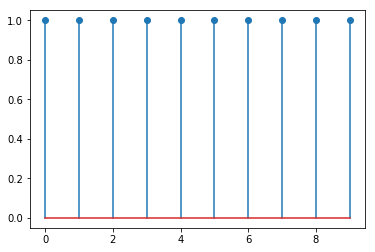

In [3]:
x = np.ones(10)
plt.stem(x)

A segunda hipótese é que o atraso é aleatório, sendo modelado como uma variável aleatória uniformemente distribuída entre 0 e 100 amostras.

In [6]:
d = np.random.randint(0, 100 + 1)

Finalmente, vamos assumir que o ruído é normal, com média zero e variância $\sigma^2$, independente e identicamente distruído.

Observe que, como o atraso varia de 1 a cem amostras, é necessário observar uma janela 111 amostras do sinal recebido para termos certeza de que o sinal x foi observado dentro da janela.

<Container object of 3 artists>

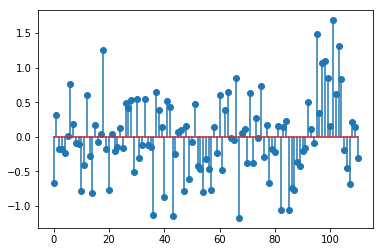

In [12]:
sigma = .5
r = sigma*np.random.randn(111)
r[d:(d+10)] += x
plt.stem(r)

Para determinar o atraso, você vai usar uma estratégia chamada máximo a posteriori: o valor de $\delta$ é aquele que é o mais provável no mundo em que o sinal $r[k]$ é observado. Para facilitar nossa notação, seja $\mathbf{r}$ um vetor contendo todas as 111 amostras de $r[k]$. Assim, o valor de $\delta$ será dado por 

$$\delta_{\mathrm{ótimo}} = \arg\max_{\delta} p_{\Delta|\mathbf{R}}(\delta|\mathbf{r})$$

Determine e implemente este detector. Busque fazer o maior número possível de simplificações. Você verá que existem diversas probabilidades e diversas funções que não precisam ser calculadas.

Imagine agora que o valor de $\delta$ seja 10. Calcule analiticamente e por simulação a probabilidade de seu detector ''preferir'' o valor de $\delta = 11$ ao invés do valor correto. Ou seja, calcule a probabilidade de $p_{\Delta|\mathbf{R}}(11|\mathbf{R}) > p_{\Delta|\mathbf{R}}(10|\mathbf{R})$.